# Travel Insurance

## Proyecto final de data science para CoderHouse

### Leandro Hornos
**Email:** leandrohornos@gmail.com <br>
**Linkedin:** https://www.linkedin.com/in/leandro-adriel-hornos/ <br>
**Github:** https://github.com/leanderShulgin/Travel-Insurance

**Contexto**<br>
Una empresa de viajes y excursiones ofrece un paquete de seguro de viaje a sus clientes. La empresa requiere saber qué clientes estarían interesados en comprarlo en función del historial de su base de datos. El seguro se ofreció a algunos de los clientes en 2019 y los datos proporcionados se han extraído del rendimiento / ventas del paquete durante ese período. Los datos se proporcionan para alrededor de 2000 de sus clientes anteriores y debe crear un modelo inteligente que pueda predecir si el cliente estará interesado en comprar el paquete de seguro de viaje en función de ciertos parámetros que se detallan a continuación.<br><br>

**Objetivo:**<br>
Analizar la variable **TravelInsurance** en relación a las características presentes en el dataset, y desarrollar un modelo capaz de predecir qué clientes adquirirán un seguro de viaje.

**Contenido**<br>
-**Age**-  Age Of The Customer <br>
-**Employment Type**-  The Sector In Which Customer Is Employed<br>
-**GraduateOrNot**-  Whether The Customer Is College Graduate Or Not<br>
-**AnnualIncome**-  The Yearly Income Of The Customer In Indian ------Rupees[Rounded To Nearest 50 Thousand Rupees]<br>
-**FamilyMembers**-  Number Of Members In Customer's Family<br>
-**ChronicDisease**-  Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.<br>
-**FrequentFlyer**-  Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].<br>
-**EverTravelledAbroad**-  Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]<br>
-**TravelInsurance**-  Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.<br>


**Fuente:** https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("mako_r")

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv", index_col=0, encoding = "ISO-8859-1")

## Data wrangling

Comenzamos por analizar el dataframe, para ver si existen datos erróneos o nulos. Miro la información general del dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


Podemos ver que los datos vienen limpios, sin valores nulos. Vemos que hay variables enteras y otras tipo texto que corresponden a categorías.

In [4]:
# Creo una columna id a partir del índice, me va a ser útil luego
df["ID"] = df.index + 1

Veamos el encabezado del dataframe para ver cómo son las catacterísticas que incluye

In [5]:
df.head(3)

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   

   TravelInsurance  ID  
0                0   1  
1                0   2  
2                1   3

La mayor parte de las variables son booleanas, expresadas como 1 o 0, pero veo que algunas están expresadas como Yes y No. Me aseguro que las **variables binarias** tengan sólo dos valores y las **convierto todas a 1s y 0s**

In [6]:
def check_bins(colnames):
    for colname in colnames:
        print(colname+": ", df[colname].unique())
        
colnames = ["GraduateOrNot", "FrequentFlyer", "ChronicDiseases","EverTravelledAbroad", "TravelInsurance"]

check_bins(colnames)

GraduateOrNot:  ['Yes' 'No']
FrequentFlyer:  ['No' 'Yes']
ChronicDiseases:  [1 0]
EverTravelledAbroad:  ['No' 'Yes']
TravelInsurance:  [0 1]


Todas las variables booleanas tienen únicamente dos valores

In [7]:
def textoABinario(texto, yval="Yes"):
    if texto == yval:
        return 1
    else:
        return 0
    
df["GraduateOrNot"]=df["GraduateOrNot"].apply(textoABinario)
df["FrequentFlyer"]=df["FrequentFlyer"].apply(textoABinario)
df["EverTravelledAbroad"]=df["EverTravelledAbroad"].apply(textoABinario)

# Compruebo que efectivamente se hizo el cambio
df.head(1)

Age    Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31  Government Sector              1        400000              6   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  ID  
0                1              0                    0                0   1

## Análisis exploratorio de las variables del dataset

Quiero ver cuandos casos positivos y negativos tengo para la variable a predecir

In [8]:
df_aux = df[["ID", "TravelInsurance"]].groupby(["TravelInsurance"]).count()
df_aux["%"] = df_aux["ID"].apply(lambda x: x*100/df["ID"].count())
df_aux

ID         %
TravelInsurance                
0                1277  64.26774
1                 710  35.73226

Vemos que en el dataset tengo predominantemente casos negativos para la variable TravelInsurance. Tendré esto en cuenta ya que el interés está en predecir los casos positivos.

In [9]:
df.describe()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count  1987.000000    1987.000000  1.987000e+03    1987.000000   
mean     29.650226       0.851535  9.327630e+05       4.752894   
std       2.913308       0.355650  3.768557e+05       1.609650   
min      25.000000       0.000000  3.000000e+05       2.000000   
25%      28.000000       1.000000  6.000000e+05       4.000000   
50%      29.000000       1.000000  9.000000e+05       5.000000   
75%      32.000000       1.000000  1.250000e+06       6.000000   
max      35.000000       1.000000  1.800000e+06       9.000000   

       ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
count      1987.000000    1987.000000          1987.000000      1987.000000   
mean          0.277806       0.209864             0.191243         0.357323   
std           0.448030       0.407314             0.393379         0.479332   
min           0.000000       0.000000             0.000000         0.000000   
25%           0.000000       0.000000             0.000000         0.000000   
50%           0.000000       0.000000             0.000000         0.000000   
75%           1.000000       0.000000             0.000000         1.000000   
max           1.000000       1.000000             1.000000         1.000000   

                ID  
count  1987.000000  
mean    994.000000  
std     573.741812  
min       1.000000  
25%     497.500000  
50%     994.000000  
75%    1490.500000  
max    1987.000000

Podemos ver que la media de edad está en los 29 años, con lo cual apreciamos que los clientes de la empresa son viajeros jóvenes. De las medias de las variables binarias podemos inferir que en la mayoría parte de los clientes no tienen enfermedades crónicas, no son vijareos frecuentes ni hay viajado antes al exterior. La familia tipo de los clientes se compone de unas 5 personas, es decir, hay más familias que parejas. Vemos también que no hay clientes que viajen sólos ya que el mínimo grupo familiar se compone de dos personas.  

### Edades

Veamos primero como es la distribución de edades de los clientes

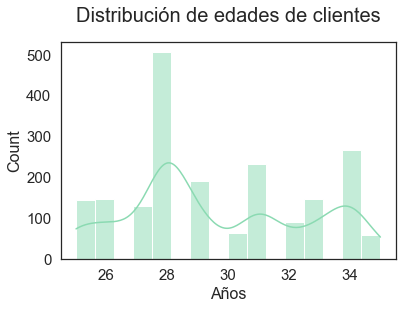

In [10]:
hist = sns.histplot(data=df, x="Age", kde=True)
hist.axes.set_title("Distribución de edades de clientes",fontsize=20, pad=20)
hist.set_xlabel("Años",fontsize=16)
hist.set_ylabel("Count",fontsize=16)
hist.tick_params(labelsize=15)

Puede verse que los clientes son personas jóvenes entre los 25 y 35 años. Dentro de estas edades la distribución es bastante pareja, aunque con cierta asimetría hacia los más jóvenes, con una edad media cercana a los 29 años. <br><br>
Veamos si hay diferencias en la edades de quienes adquirieron un seguro vs quienes no lo hicieron.

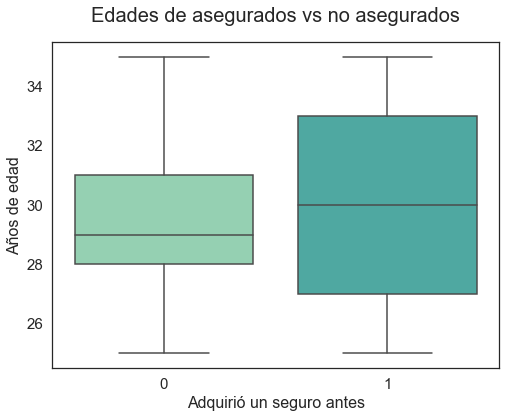

In [11]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="TravelInsurance", y="Age", data=df)
bp.axes.set_title("Edades de asegurados vs no asegurados",fontsize=20, pad=20)
bp.set_xlabel("Adquirió un seguro antes",fontsize=16)
bp.set_ylabel("Años de edad",fontsize=16)
bp.tick_params(labelsize=15)

Puede observarse que la distribución de edades entre quienes adquieren un seguro de viaje y quienes no es bastante similar. Se nota más concentración de edad alrededor de la media entre quienes no adquieren seguros de viaje. Más allá de leves tendencias, no se observa que la edad sea un factor determinante en la decisión de adquirir un seguro.

### Posición económica

Vemos ahora como se distribuyen los ingresos de los clientes

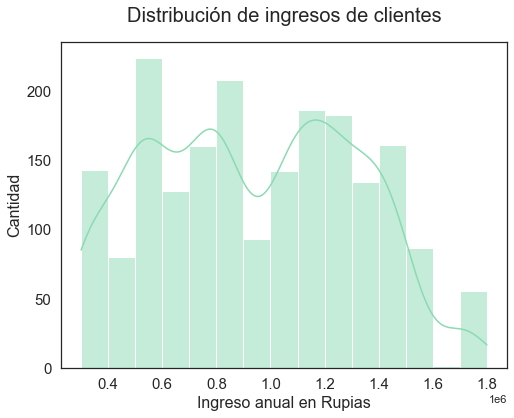

In [12]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

hist = sns.histplot(data=df, x="AnnualIncome", kde=True)
hist.axes.set_title("Distribución de ingresos de clientes",fontsize=20, pad=20)
hist.set_xlabel("Ingreso anual en Rupias",fontsize=16)
hist.set_ylabel("Cantidad",fontsize=16)
hist.tick_params(labelsize=15)

Los ingresos de los clientes se distribuyen en un rango bastante amplio, pero la distribución es bastante homogénea para lo que suele ser una distribución de ingresos, donde la mayor cantidad de individuos suele agruparse en los ingresos más bajos. <br><br>
Comparemos ahora los ingresos de aquellas personas que adquirieron el seguro versus aquellas que no lo hicieron

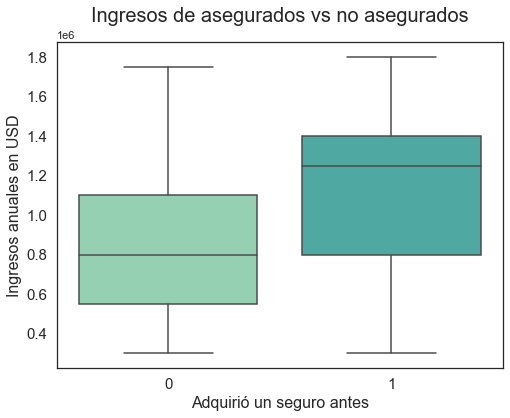

In [13]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="TravelInsurance", y="AnnualIncome", data=df)
bp.axes.set_title("Ingresos de asegurados vs no asegurados",fontsize=20, pad=20)
bp.set_xlabel("Adquirió un seguro antes",fontsize=16)
bp.set_ylabel("Ingresos anuales en USD",fontsize=16)
bp.tick_params(labelsize=15)

Si bien existe bastante solapamiento entre ambos grupos, puede verse que las personas que adquirieron un seguro tienden a tener mayores ingresos que aquellas que no.

### Correlaciones entre variables

Se calculan a continuación los coeficientes de correlación para los pares de variables en el dataset

In [14]:
df.corr()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
Age                  1.000000       0.027125     -0.020101       0.027409   
GraduateOrNot        0.027125       1.000000      0.108066       0.021201   
AnnualIncome        -0.020101       0.108066      1.000000      -0.015367   
FamilyMembers        0.027409       0.021201     -0.015367       1.000000   
ChronicDiseases      0.007359       0.018811     -0.001149       0.028209   
FrequentFlyer       -0.033159      -0.028120      0.353087      -0.023775   
EverTravelledAbroad -0.012779       0.062683      0.486043      -0.020755   
TravelInsurance      0.061060       0.018934      0.396763       0.079909   
ID                  -0.004917      -0.008602     -0.025031      -0.041506   

                     ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
Age                         0.007359      -0.033159            -0.012779   
GraduateOrNot               0.018811      -0.028120             0.062683   
AnnualIncome               -0.001149       0.353087             0.486043   
FamilyMembers               0.028209      -0.023775            -0.020755   
ChronicDiseases             1.000000      -0.043720             0.021238   
FrequentFlyer              -0.043720       1.000000             0.277334   
EverTravelledAbroad         0.021238       0.277334             1.000000   
TravelInsurance             0.018190       0.232103             0.433183   
ID                         -0.006858      -0.004596            -0.002160   

                     TravelInsurance        ID  
Age                         0.061060 -0.004917  
GraduateOrNot               0.018934 -0.008602  
AnnualIncome                0.396763 -0.025031  
FamilyMembers               0.079909 -0.041506  
ChronicDiseases             0.018190 -0.006858  
FrequentFlyer               0.232103 -0.004596  
EverTravelledAbroad         0.433183 -0.002160  
TravelInsurance             1.000000  0.006196  
ID                          0.006196  1.000000

Text(0.5, 1.0, 'Correlaciones entre variables')

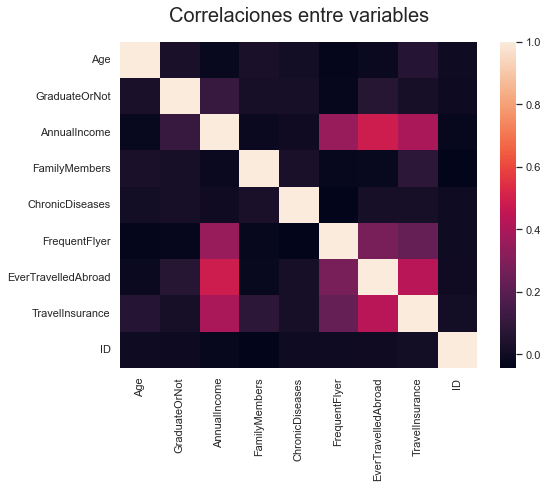

In [15]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

corr_hm = sns.heatmap(df.corr())
corr_hm.axes.set_title("Correlaciones entre variables",fontsize=20, pad=20)

Se puede ver que parece cierta correlación entre el ingreso de los clientes y el hecho de ser viajeros frecuentes, haber viajado al exterior anteriormente y haber adquirido el seguro. Concretamente en relación a la adquisición de un seguro, se ve que la correlación más fuete es con el hecho de haber viajado anteriormente al exterior (EverTravelledAbroad).

## Análisis de variables binarias

El dataset contiene un conjunto de características de los clientes definidas como variables binarias, las cuales son **enfermedad crónica, viajero frencuente, viajes al exterior en el pasado y si se han graduado**. Podemos estudiar estas variables comparativamente, viendo como es la proporción dentro de cada subgrupo, según si poseen o no alguna de dichas características.

*Quiero dividir cada variable binaria en dos categorías, con y sin la característica. Luego, hacer un stacked percent bar plot para cada categoría, con el % que compró y no compró el seguro de cada grupo.*

In [16]:
def binATexto(val, yesval, noval):
    if val == 1:
        return yesval
    elif val == 0:
        return noval
    else:
        return val
    
# Hago una copia del dataframe, me quedo sólo con las columnas Age y TravelInsurance
# Voy a usar la variable Age como id, no me importa que se repitan los valores es sólo para contar individuos.

df_bin = df.drop(["Age",'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'], axis = 1)

# En el nuevo dataframe creo las columnas de las variables binarias, asignándole un valor único y representativo para 1 o 0 a cada variable.
# Estos valores luego definirán las categorías (graduado, no graduado, con viajes previso, sin viajes previos, etc..)

df_bin['Graduacion'] = df['GraduateOrNot'].apply(lambda x: binATexto(x, "Graduado", "No Graduado"))
df_bin['Viajero Frecuente'] = df['FrequentFlyer'].apply(lambda x: binATexto(x, "Viajero Frecuente", "No Viajero Frecuente"))
df_bin['Enfermedad'] = df['ChronicDiseases'].apply(lambda x: binATexto(x, "Con Enfermedad", "Sin enferemedad"))
df_bin["Viajes Previos"] = df['EverTravelledAbroad'].apply(lambda x: binATexto(x, "Viajo antes al exterior", "No viajo antes al exterior"))

# df_bin.head()

In [17]:
# Junto todos los valores posibles de cada variable binaria en una úniva variable mediante melt

df_bin_melt = pd.melt(df_bin, id_vars=['ID','TravelInsurance'], value_vars=['Graduacion','Enfermedad', 'Viajero Frecuente',
       'Viajes Previos'])
# df_bin_melt.head()

In [18]:
# Ahora puedo agrupar variable binaria, valores posibles de dichas variables y si contrataron seguro o no
# Uso la variable ID para contar individuos
df_bin_grouped = df_bin_melt.groupby(["variable", "value", "TravelInsurance"]).count().reset_index()
# df_bin_grouped

In [19]:
# En lugar de tener una fila para cada combinacion posible, quiero tener una columna para las categorías y dos columnas 
# que me indiquen el numero de asegurados y no asegurados correspondiente a cada categoría respectivamente.
# Para eso hago un pivot del dataframe agrupado previamente

df_bin_pivot = df_bin_grouped.pivot("value","TravelInsurance", "ID")
df_bin_pivot.index.name = None # saco el nombre del índice que se genera al hacer el pivot
df_bin_pivot = df_bin_pivot.rename(columns={0: 'No Asegurado', 1: 'Asegurado'}) # renombro las columnas para más claridad
df_bin_pivot["Categoria"] = df_bin_pivot.index
# df_bin_pivot

In [20]:
def porcentaje(val1, val2):
    # calcula el porcentaje sobre el total de un valor
    # para un par de valores
    return 100 * val1 / (val1 + val2)

# Nuevas columnas con porcentajes:

df_bin_pivot["% Asegurado"] = df_bin_pivot.apply(lambda fila : porcentaje(fila["Asegurado"],
                     fila["No Asegurado"]), axis = 1)
df_bin_pivot["% No Asegurado"] = df_bin_pivot.apply(lambda fila : porcentaje(fila["No Asegurado"],
                     fila["Asegurado"]), axis = 1)
df_bin_pivot

TravelInsurance             No Asegurado  Asegurado  \
Con Enfermedad                       347        205   
Graduado                            1081        611   
No Graduado                          196         99   
No Viajero Frecuente                1099        471   
No viajo antes al exterior          1195        412   
Sin enferemedad                      930        505   
Viajero Frecuente                    178        239   
Viajo antes al exterior               82        298   

TravelInsurance                              Categoria  % Asegurado  \
Con Enfermedad                          Con Enfermedad    37.137681   
Graduado                                      Graduado    36.111111   
No Graduado                                No Graduado    33.559322   
No Viajero Frecuente              No Viajero Frecuente    30.000000   
No viajo antes al exterior  No viajo antes al exterior    25.637834   
Sin enferemedad                        Sin enferemedad    35.191638   
Viajero Frecuente                    Viajero Frecuente    57.314149   
Viajo antes al exterior        Viajo antes al exterior    78.421053   

TravelInsurance             % No Asegurado  
Con Enfermedad                   62.862319  
Graduado                         63.888889  
No Graduado                      66.440678  
No Viajero Frecuente             70.000000  
No viajo antes al exterior       74.362166  
Sin enferemedad                  64.808362  
Viajero Frecuente                42.685851  
Viajo antes al exterior          21.578947

En el anterior dataframe podemos ver los porcentajes de personas que han adquirido dentro de cada categoría derivada de las variables binarias. Para tener más claro el panorama, graficamos estos porcentajes en un stacked bar plot, ordenando las categorías por porcentaje de asegurados

Text(0, 0.5, 'Categoría')

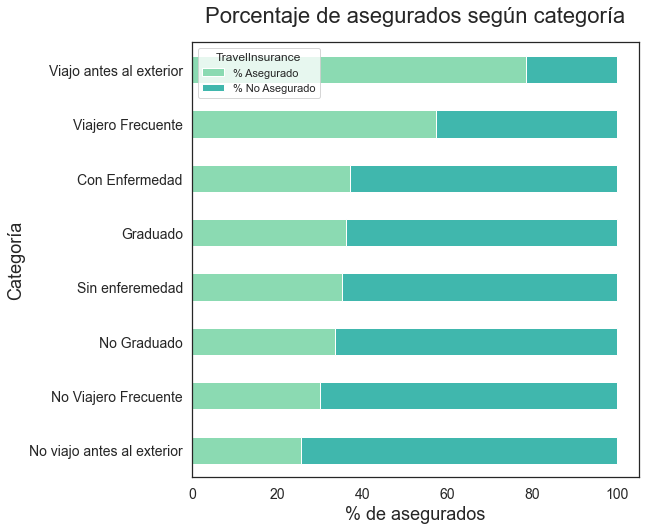

In [21]:
# plot a Stacked Bar Chart using matplotlib

df_bin_graf = df_bin_pivot[["Categoria", "% Asegurado", "% No Asegurado"]]
df_bin_graf = df_bin_graf.sort_values(["% Asegurado"], ascending=True) # Oederno por porcentaje de asegurados
sbp = df_bin_graf.plot(
    x = 'Categoria',
    kind = 'barh',
    stacked = True,
    title = 'Porcentaje de asegurados por categoría',
    figsize=(8,8),
    fontsize=14,
    mark_right = True)
sbp.set_title("Porcentaje de asegurados según categoría",pad=20, fontdict={'fontsize':22})
sbp.set_xlabel('% de asegurados',fontdict={'fontsize':18})
sbp.set_ylabel('Categoría',fontdict={'fontsize':18})

Se observa en el gráfico anterior que el mayor porcentaje de aseguados se encuentra entre quienes han viajado antes al exterior. Además, quienes no hicieron viajes al exterior son los que menos contrataron seguros, por lo que esta característica es la que muestra la mayor disparidad a la hora de elegir o no contratar un seguro. En segundo lugar se encuentran los viajeros frecuentes cómo los que más seguros contratan, habiendo también una gran diferencia con los que no lo son. Es posible que exista un alto solapamiento entre los viajeros frecuentes y quienes han viajado al exterior anteriormente. Habría que ver cuan es lo que lleva a este grupo a adquirir seguros, puede ser que malas experiencias en viajes anteriores los haya vuelto más precabidos, o bien que al viajar al exterior es más probable que deseen contratar un seguro ya que en dicha situación no tienen acceso a los recursos que si encuentran en su país de origen.

### Viajes previos al exterior: relación con otras variables

Se observa en el gráfico anterior que la mayor proporción de personas que adquirieron en seguro puede hallarse entre aquellas que han viajado antes al exterior y que son viajeros frecuentes. Tiene sentido sospechar que puede existir una fuerte correlación entre ambas, ya que alguien que viaja frecuentemente probablemente haya salido del país al menos una vez. Además, se sospecha que la posición económica de aquellas personas que salieron del pais probablemente sea mejor que la de quienes nunca lo han hecho. Vamos a estudiar a continuación como se relaciona la variable EverTravelledAbroad con otras variables del dataset.

### Relación entre haber viajado al exterior y la posición económica

Vemos a continuación como es el ingreso anual de las personas que no han viajado antes al exterior vs aquellas que si lo han hecho

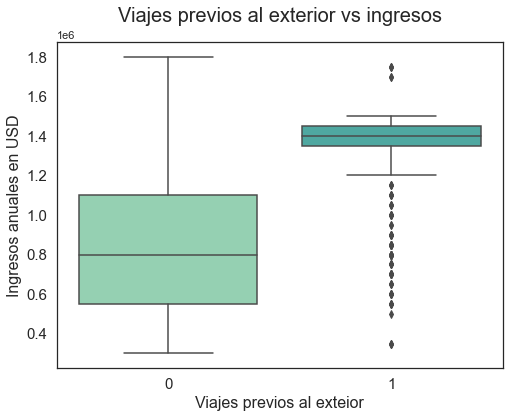

In [22]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="EverTravelledAbroad", y="AnnualIncome", data=df)
bp.axes.set_title("Viajes previos al exterior vs ingresos",fontsize=20, pad=20)
bp.set_xlabel("Viajes previos al exteior",fontsize=16)
bp.set_ylabel("Ingresos anuales en USD",fontsize=16)
bp.tick_params(labelsize=15)

En la matriz de correlaciones y su correspondiente heatmap se puede apreciar que una de las correlaciones más altas de la variable EverTravelledAbroad se da con AnnualIncome, es decir, con el poder adquisitivo de los clientes. En los boxplots que aquí se muestran se observa que **quienes viajaron antes al exterior tienen un salario medio claramente superior a quienes no lo han hecho.** Además, el rango de ingresos de quienes viajaron antes al exterior está muy concentrados alrededor de la mediana, es decir, la mayoría tiene salarios altos. Se observan muchos "outliers" hacia menores ingresos en quienes han viajado al exterior, que podría deberse a que dichas personas viajaron por motivos laborales y no pagaron los gastos del viaje de su propip bolsillo, o bien que en alguna ocasión han hecho un esfuerzo económico excepcional para hacerlo.

### Relación entre la edad de los clientes y el haber viajado antes al exterior

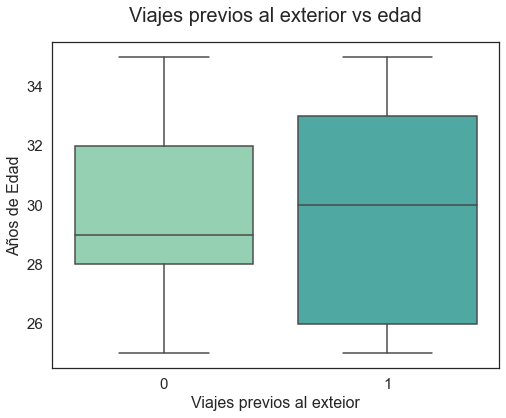

In [23]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="EverTravelledAbroad", y="Age", data=df)
bp.axes.set_title("Viajes previos al exterior vs edad",fontsize=20, pad=20)
bp.set_xlabel("Viajes previos al exteior",fontsize=16)
bp.set_ylabel("Años de Edad",fontsize=16)
bp.tick_params(labelsize=15)

La media de edad de quienes viajaron antes al exterior es ligeramente mayor que quienes no, lo cual puede estar correlacionado con mayores ingresos. Sin embargo, hay una mayor dispersión en la edad de quienes viajaron antes

**Quiero ver ahora cuanto solapamiento hay entre categorías.** Es decir, ¿que porcentaje de quienes viajaron antes al exterior son también viajeros frecuentes?¿y viceversa?

In [24]:
viajaron_exterior = df[df["EverTravelledAbroad"] == 1]["ID"].count()
viajeros_frecuentes = df[df["FrequentFlyer"] == 1]["ID"].count()
frecuentes_y_exterior = df[df["EverTravelledAbroad"] == 1]
frecuentes_y_exterior = frecuentes_y_exterior[frecuentes_y_exterior["FrequentFlyer"] == 1]["ID"].count()                               

d = {"Cantidad": [viajaron_exterior, viajeros_frecuentes, frecuentes_y_exterior]}
i = ["Viajaron al exterior antes", "Viajeros frecuentes", "Frecuentes y exterior"]
df2 = pd.DataFrame(data=d, index=i)
df2

Cantidad
Viajaron al exterior antes       380
Viajeros frecuentes              417
Frecuentes y exterior            168

In [25]:
# Porcentaje de personas que viajaron al exterior que también son viajeros frecuentes:
100 * frecuentes_y_exterior / viajaron_exterior

44.21052631578947

In [26]:
# Porcentaje de personas que son viajeros frecuentes que también viajaron al exterior que también son viajeros frecuentes:
100 * frecuentes_y_exterior / viajeros_frecuentes

40.28776978417266

Vemos de los datos anteriores que no hay tanto solapamiento entre grupos. Es un poco más probable que alguien sea viajero frecuente si ha viajado al exterior antes que viceversa, pero la diferencia es poca. Asumamos que las variables son más o menos independientes, lo cual tiene sentido ya que en la matriz de que el coeficiente de correlación entre ambas variables es bajo. Veamos que pasa cuando una persona es viajera frecuente y además ha viajado antes al exterior.

In [27]:
df_frecuentes_y_exterior = df[df["EverTravelledAbroad"] == 1]
df_frecuentes_y_exterior = df_frecuentes_y_exterior[df_frecuentes_y_exterior["FrequentFlyer"] == 1]
df_frecuentes_y_exterior = df_frecuentes_y_exterior[["ID", "TravelInsurance"]]
df_frecuentes_y_exterior = df_frecuentes_y_exterior.groupby("TravelInsurance").count().reset_index()
df_frecuentes_y_exterior["TravelInsurance"] = df_frecuentes_y_exterior["TravelInsurance"].apply(lambda x: binATexto(x, "Asegurado", "No Asegurado"))
df_frecuentes_y_exterior = df_frecuentes_y_exterior.set_index("TravelInsurance")

In [28]:
df_frecuentes_y_exterior["%"] = df_frecuentes_y_exterior["ID"].apply(lambda x : 100*x/frecuentes_y_exterior)
df_frecuentes_y_exterior

ID          %
TravelInsurance                
No Asegurado      20  11.904762
Asegurado        148  88.095238

Text(0, 0.5, '%')

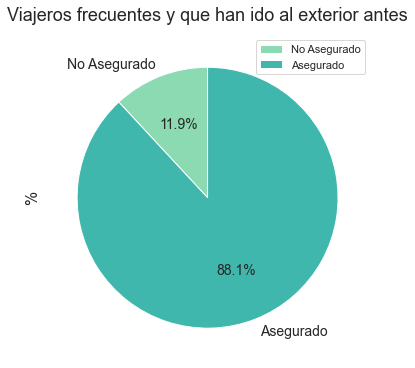

In [29]:
pie = df_frecuentes_y_exterior.plot.pie(
    y="%",
    figsize=(6,6),
    fontsize=14,
    autopct='%1.1f%%',
    startangle=90
)

pie.set_title("Viajeros frecuentes y que han ido al exterior antes", pad=14, fontdict={'fontsize':18})
pie.set_ylabel("%",fontsize=16)

Puede observarse en el gráfico de torta que casi el 90% de las personas que han viajado antes al exterior y que además son viajeros frecuentes adquirieron el seguro antes. Estas dos categorías en conjunto muestran el mayor porcentaje de personas aseguradas hasta el momento. Sin embargo, restringir los clientes target a solamente aquellos que reunan estas dos condiciones en conjunto es demasiado limitado ya que corresponden solamente a aproximadamente un 10% del total de los clientes.

## Composición familiar

Veamos ahora cómo afecta la composición familiar a la contratación de un seguro

In [30]:
df_fam = df.groupby(["FamilyMembers", "TravelInsurance"])["ID"].count().reset_index()
df_fam = df_fam.pivot("FamilyMembers","TravelInsurance", "ID").reset_index()
df_fam = df_fam.rename(columns={0: 'No Asegurado', 1: 'Asegurado'})
df_fam.set_index("FamilyMembers")
df_fam["% Asegurado"] = df_fam.apply(lambda fila : porcentaje(fila["Asegurado"],
                     fila["No Asegurado"]), axis = 1)
df_fam["% No Asegurado"] = df_fam.apply(lambda fila : porcentaje(fila["No Asegurado"],
                     fila["Asegurado"]), axis = 1)
df_fam

TravelInsurance  FamilyMembers  No Asegurado  Asegurado  % Asegurado  \
0                            2            66         27    29.032258   
1                            3           242        135    35.809019   
2                            4           345        160    31.683168   
3                            5           295        131    30.751174   
4                            6           165        129    43.877551   
5                            7            97         81    45.505618   
6                            8            38         21    35.593220   
7                            9            29         26    47.272727   

TravelInsurance  % No Asegurado  
0                     70.967742  
1                     64.190981  
2                     68.316832  
3                     69.248826  
4                     56.122449  
5                     54.494382  
6                     64.406780  
7                     52.727273

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name="Asegurado", x=df_fam["FamilyMembers"], y=df_fam["Asegurado"]),
    go.Bar(name="No Asegurado", x=df_fam["FamilyMembers"], y=df_fam["No Asegurado"])
])


fig.update_layout(
    barmode='stack',
    title="Clientes asegurados según composición familiar",
    xaxis_title="Nro de familiares",
    yaxis_title="Cantidad de clientes",
)
fig.show()


In [32]:
fig = go.Figure(data=[
    go.Bar(name="Asegurado", x=df_fam["FamilyMembers"], y=df_fam["% Asegurado"]),
    go.Bar(name="No Asegurado", x=df_fam["FamilyMembers"], y=df_fam["% No Asegurado"])
])
# Change the bar mode
fig.update_layout(
    barmode='stack',
    title="Porcentaje de clientes asegurados según composición familiar",
    xaxis_title="Nro de familiares",
    yaxis_title="%",
)
fig.show()

Vemos que la mayoría de los clientes pertenece a un grupo familiar de entre 3 y 5 personas. Asumiendo que los grupos de dos son parejas, tendríamos pocas parejas sin hijos como clientes, así como pocas familias numerosas. En cuanto al porcentaje de asegurados dentro de cada grupo, vemos valores que oscilan dentro del rango de 30 a 40%, con alguna cierta tendencia a ser algo mayor a partir de los 6 miembros. Sin embargo, no se observan grandes diferencias y la composición familiar no parece ser un factor muy determinante a la hora de decidir si adquirir o no un seguro de viaje

## Ingreso en relación a la composición familiar

In [33]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance', 'ID'],
      dtype='object')

<AxesSubplot:xlabel='ingreso por familiar', ylabel='Count'>

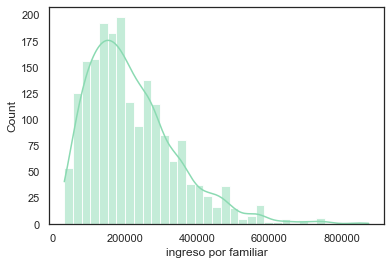

In [34]:
df["ingreso por familiar"] = df.apply(lambda row : row['AnnualIncome'] / row['FamilyMembers'], axis = 1)
sns.histplot(data=df, x="ingreso por familiar", kde=True)

La distribucion de ingresos por familiar según vemos es bastante asimétrica. Podemos probar normalizarla calculando el logaritmo del valor calculad.

<AxesSubplot:xlabel='log ingreso por familiar', ylabel='Count'>

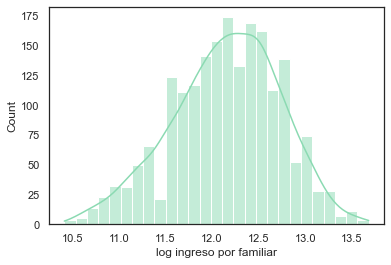

In [35]:
df["log ingreso por familiar"] = df.apply(lambda row :  np.log(row["ingreso por familiar"]), axis = 1)
sns.histplot(data=df, x="log ingreso por familiar", kde=True)

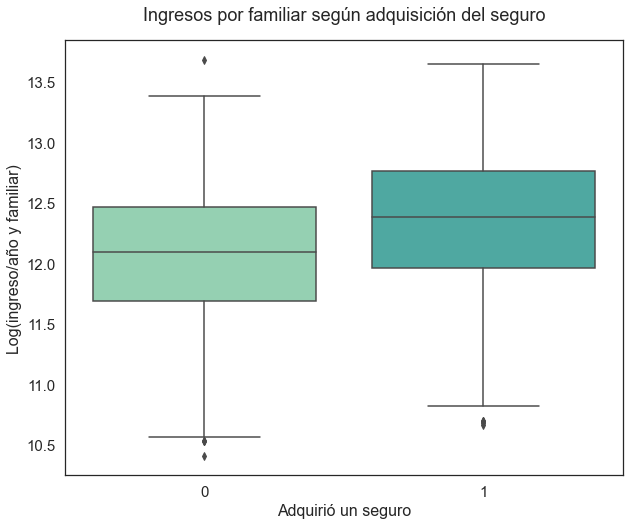

In [36]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="TravelInsurance", y="log ingreso por familiar", data=df)
bp.axes.set_title("Ingresos por familiar según adquisición del seguro",fontsize=18, pad=20)
bp.set_xlabel("Adquirió un seguro",fontsize=16)
bp.set_ylabel("Log(ingreso/año y familiar)",fontsize=16)
bp.tick_params(labelsize=15)

Vemos que los ingresos por familiar son algo más altos entre quienes han adquirido el seguro, aunque la diferencia no es dramática. Habíamos visto una influencia clara en el haber viajado antes al exterior. Veamos como se distruben los ingresos por familiar entre quienes adquirieron o no el seguro teniendo en cuenta además dicha característica

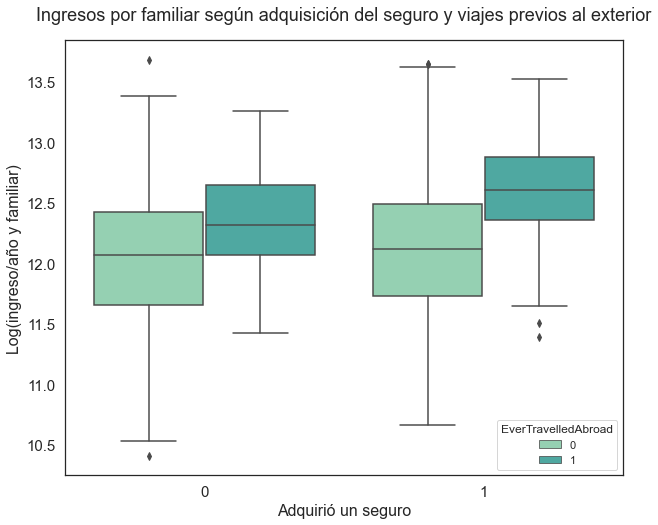

In [37]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="TravelInsurance", y="log ingreso por familiar", hue="EverTravelledAbroad", data=df)
bp.axes.set_title("Ingresos por familiar según adquisición del seguro y viajes previos al exterior",fontsize=18, pad=20)
bp.set_xlabel("Adquirió un seguro",fontsize=16)
bp.set_ylabel("Log(ingreso/año y familiar)",fontsize=16)
bp.tick_params(labelsize=15)


En los boxplots de arriba podemos observar que no hay una clara diferencia en ingreso por familiar entre quienes no viajaron antes al exterior y adquirieron o no el seguro. Entre quienes sí viajaron al exterior en el pasado, vemos que quienes adquirieron un seguro tienen un ingreso por familiar algo mayor que quienes no lo hicieron. Seguimos viendo entonces que el haber viajado antes al exterior tendría más peso que el ingreso, pero dentro de ese subgrupo quienes tienen un mejor pasaje económico tienden a asegurarse más.

## Modelo 1: Arbol de decisiones

Por lo que observamos en el dataset, la mayoría de las variables son categóricas, y dentro de ellas muchas son binarias, incluyendo la variable a predecir: TravelInsurance. Es por ello que un arbol de decisiones surge como un modelo atractivo para intentar predecir si un cliente adquirirá un seguro.
<br><br>
Vimos en el análisis de las variables binarias que aquellas que parecen tener más peso en la contratación de un seguro parecen ser EverTravelledAbroad y FrequentFlyer. Vamos ahora a utilizar un arbol de decisiones para ver si somos capaces de modelar la variable TravelInsurance a partir de las variables categóricas del dataset.

In [38]:
# Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split

# Importamos el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# Visualizaciones
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Deseo incluir las variables relacionadas al ingreso y tipo de empleo. Para el caso del empleo, tenemos una variable categórica, pero para el ingreso tenemos una variable numérica, de la cual deberemos derivar alguna variable que de una categoría al cliente en base a sus ingresos.

In [39]:
df["Employment Type"].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

Vemos que hay solo dos clases de empleo, público y privado. Vamos a crear una columna que se llame sólo "Government Sector" y sea 1 si es verdadera y 0 si es falsa, es decir, la convertimos en una variable binaria más.<br>
Lo mismo vamos a hacer con el ingreso, calculamos la media y creamos la variable binaria High Income. Si AnualIncome está sobre la media valdrá 1, caso contrario valdrá 0.

In [40]:
df_tree = df
income_mean = df['AnnualIncome'].mean()

def classify_income(x, mean):
    if x >= mean:
        return 1
    else:
        return 0
    
df_tree['Government Sector'] = df_tree["Employment Type"].apply(lambda x: textoABinario(x, yval='Government Sector'))
df_tree['High Income']  = df_tree['AnnualIncome'].apply(lambda x: classify_income(x, income_mean))

In [41]:
# Elimino las columnas que no me interesan, y la variable que quiero predecir (TravelInsurance)
X = df_tree.drop(['ID','Employment Type','AnnualIncome', 'ingreso por familiar', 'log ingreso por familiar','TravelInsurance'], axis=1)
y = df_tree.TravelInsurance #Defino el Target

In [42]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Búsqueda de los hiperparámetros óptimos para el árbol

Voy a usar la GridSearch de Sklearn para optimizar los hiperparámetros del árbol de decisión.

In [43]:
arbol = DecisionTreeClassifier() 
param_grid = {'max_depth': list(range(1, 4)) , 'min_samples_leaf':[5,10,15,20]}
cv = KFold(n_splits=5)

grid = GridSearchCV(arbol, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [44]:
pd.DataFrame(grid.cv_results_)[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score', 'mean_test_score' , 'std_test_score']].sort_values(by='mean_test_score',ascending=False)

params  split0_test_score  \
9   {'max_depth': 3, 'min_samples_leaf': 10}           0.816547   
10  {'max_depth': 3, 'min_samples_leaf': 15}           0.820144   
11  {'max_depth': 3, 'min_samples_leaf': 20}           0.820144   
8    {'max_depth': 3, 'min_samples_leaf': 5}           0.816547   
0    {'max_depth': 1, 'min_samples_leaf': 5}           0.794964   
1   {'max_depth': 1, 'min_samples_leaf': 10}           0.794964   
2   {'max_depth': 1, 'min_samples_leaf': 15}           0.794964   
3   {'max_depth': 1, 'min_samples_leaf': 20}           0.794964   
4    {'max_depth': 2, 'min_samples_leaf': 5}           0.791367   
5   {'max_depth': 2, 'min_samples_leaf': 10}           0.791367   
6   {'max_depth': 2, 'min_samples_leaf': 15}           0.791367   
7   {'max_depth': 2, 'min_samples_leaf': 20}           0.791367   

    split1_test_score  split2_test_score  split3_test_score  \
9            0.784173           0.791367           0.791367   
10           0.784173           0.798561           0.791367   
11           0.784173           0.798561           0.791367   
8            0.791367           0.794964           0.766187   
0            0.762590           0.758993           0.737410   
1            0.762590           0.758993           0.737410   
2            0.762590           0.758993           0.737410   
3            0.762590           0.758993           0.737410   
4            0.751799           0.769784           0.733813   
5            0.751799           0.769784           0.733813   
6            0.751799           0.769784           0.733813   
7            0.751799           0.769784           0.733813   

    split4_test_score  mean_test_score  std_test_score  
9            0.816547         0.800000        0.013763  
10           0.798561         0.798561        0.012038  
11           0.798561         0.798561        0.012038  
8            0.816547         0.797122        0.018705  
0            0.744604         0.759712        0.019885  
1            0.744604         0.759712        0.019885  
2            0.744604         0.759712        0.019885  
3            0.744604         0.759712        0.019885  
4            0.744604         0.758273        0.020272  
5            0.744604         0.758273        0.020272  
6            0.744604         0.758273        0.020272  
7            0.744604         0.758273        0.020272

In [45]:
best_max_depth = grid.best_params_['max_depth']
best_min_samples_leaf = grid.best_params_['min_samples_leaf']
print('La mejor profundidad es ' + str(best_max_depth) + ' y la mejor cantidad minima de muestras por hoja es ' + str(best_min_samples_leaf))

La mejor profundidad es 3 y la mejor cantidad minima de muestras por hoja es 10


### Árbol de decisiones optimizado

Con los parámetros obtenidos, creo el modelo de arbol de decisión

In [46]:
#Creamos el modelo
arbol = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf ,random_state = 42) 

In [47]:
#Entrenamos el modelo
arbol.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [48]:
#Prediccion en Train
y_train_pred = arbol.predict(X_train)
#Prediccion en Test
y_test_pred = arbol.predict(X_test) 

### Estructura del arbol

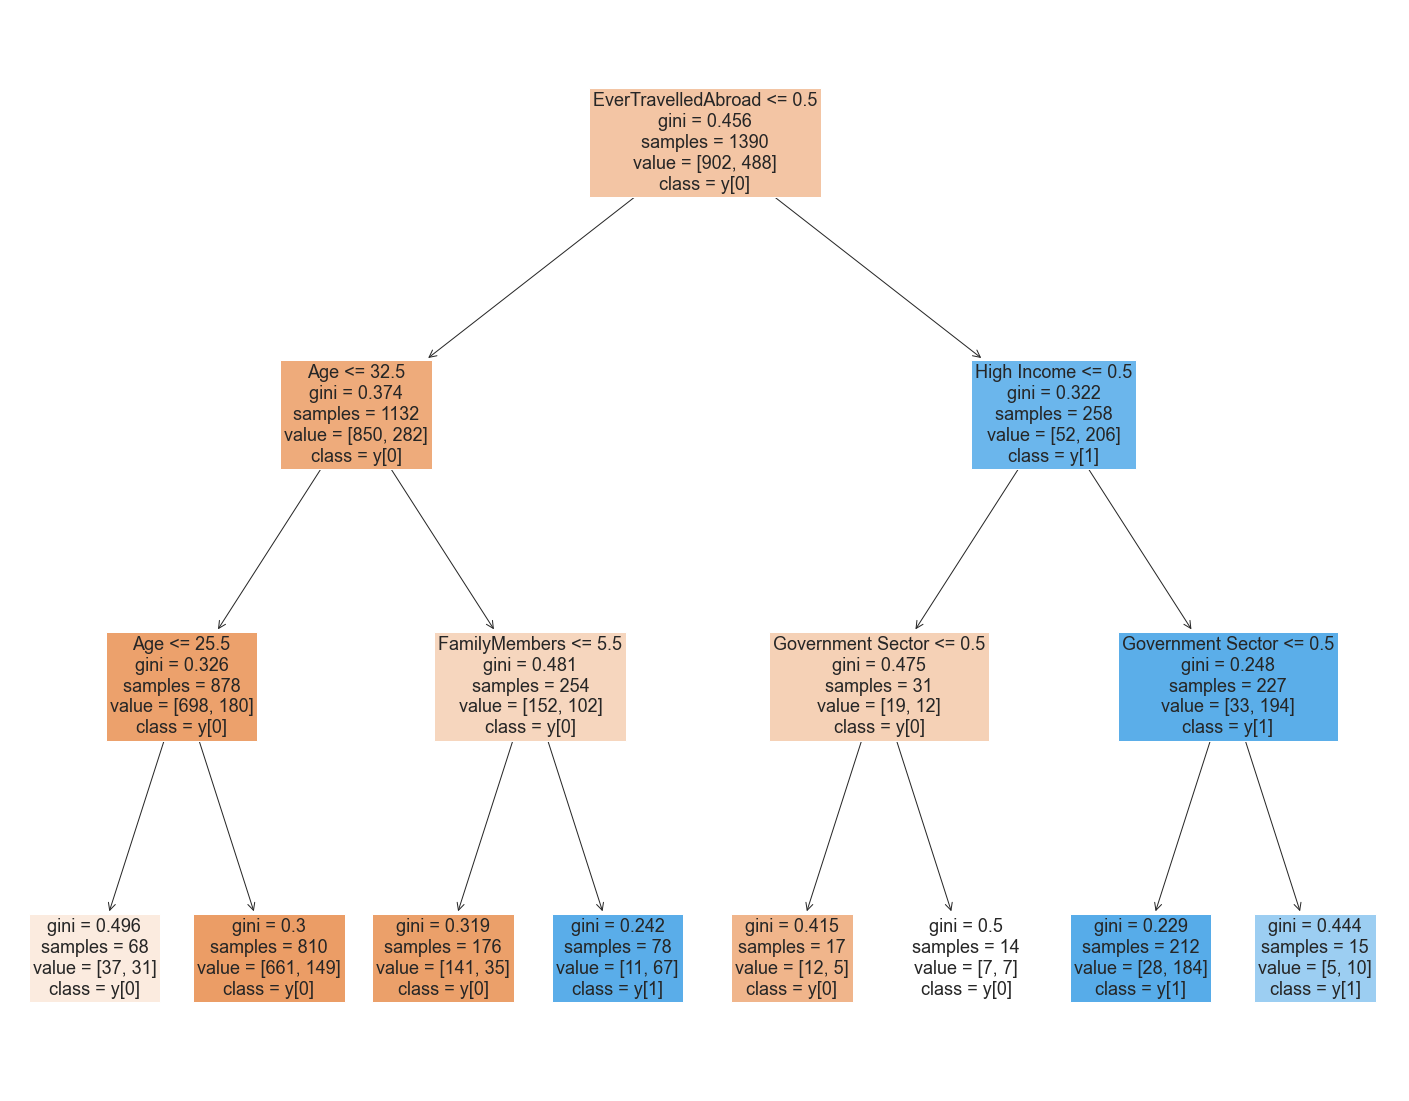

In [49]:
fig = plt.figure(figsize=(25,20))
plot = plot_tree(arbol, feature_names=X.columns, filled=True, fontsize=18, class_names=True)

[Text(0, 0, 'GraduateOrNot'),
 Text(1, 0, 'ChronicDiseases'),
 Text(2, 0, 'FrequentFlyer'),
 Text(3, 0, 'Government Sector'),
 Text(4, 0, 'High Income'),
 Text(5, 0, 'Age'),
 Text(6, 0, 'FamilyMembers'),
 Text(7, 0, 'EverTravelledAbroad')]

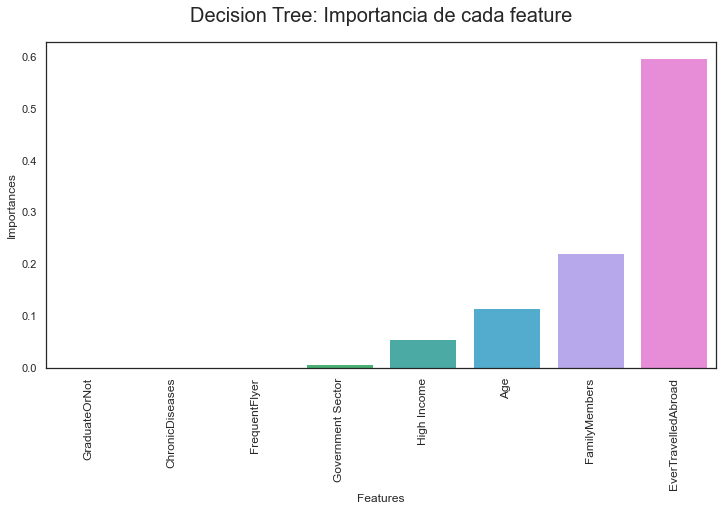

In [50]:
importances = arbol.feature_importances_
columns = X.columns

df_feat = pd.DataFrame()
df_feat["Features"] = X.columns
df_feat["Importances"] = arbol.feature_importances_
df_feat.sort_values(["Importances"], inplace=True)

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.barplot(x=df_feat["Features"], y=df_feat["Importances"])
bp.axes.set_title("Decision Tree: Importancia de cada feature",fontsize=20, pad=20)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90, fontsize=12)


Vemos que, como esperábamos a partir del análisis exploratorio univariado, la característica más importante es EverTravelledAbroad, es decir, si el cliente ha viajado antes al exterior. Vemos que le siguen en menos medida la composición familiar y la edad, variables que habíamos observado parecían tener alguna influencia. Por otro lado, si bien vimos que si un cliente además de haber viajado al exterior entraba en la categoría "FrequentFlyer" tenía más posibilidad de haber adquirido un seguro. Sin embargo, la cantidad de clientes que caen en ambas categorías es muy pequeña y puede verse que en el arbol de decisiones no tiene importancia. <br>
Es interesante notar también que la variable ChronicDiseases no parece tener ninguna influencia en la decisión de adquirir un seguro, esto es importante ya que la empresa desea ofrecer un seguro contra el Covid. Si bien en el pasado el poseer enfermedades crónicas no fue relevante, no puede saberse de estos datos si la pandemia actual no afectará a esta variable ya que alguien con enfermedades crónicas puede contraer una forma más grave de covid. 

### Métricas del modelo

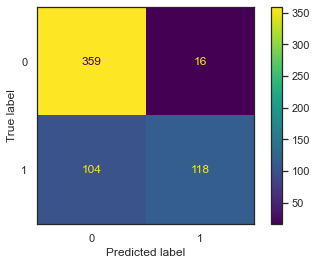

Model  Train Accuracy  Test Accuracy  Precision Score  \
0  Modelo 1: Decision Tree        0.805036       0.798995         0.880597   

   Recall Score  F1 Score  
0      0.531532  0.662921

In [51]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

#Precision Score
prec_score = precision_score(y_test, y_test_pred)

#Recall Score
rec_score = recall_score(y_test, y_test_pred)

#F1 Score
f1_score_val = f1_score(y_test, y_test_pred) 

vals = data=["Modelo 1: Decision Tree",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]
cols = ["Model","Train Accuracy", "Test Accuracy", "Precision Score", "Recall Score", "F1 Score"]

df_metrics = pd.DataFrame([vals], columns=cols)

cm = confusion_matrix(y_test, y_test_pred, labels=arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot()
plt.show()

df_metrics

<ul>
    <li><strong>Accuracy:</strong> El modelo ajusta razonablemente bien con un accuracy de 80% tanto en train como en test</li>
    <li><strong>Precision:</strong> El modelo tiene una alta precisión, es decir, genera relativamente pocos falsos positivos. casi el 90% de los clientes que el modelo identifica como potenciales compradores adquirieron el seguro negativos</li>
    <li><strong>Recall:</strong> A diferencia de la presición, el modelo tiene un recall bajo, es decir que genera muchos falsos negativos, algo que se ve claro en la matriz de confusión.El árbol solo fue capaz de detectar alrededor de la mitad de los compradores </li>
</ul>

Podemos ver entonces que podemos confiar en los clientes que el modelo identifica como potenciales compradores del producto. Sin embargo, existe una gran proporcón de los compradores del seguro que no pudo ser detectada por el modelo.
<br><br>
Este modelo funciona bien si lo que se quiere evitar a toda costa ofrecer el producto a personas que no estarían interesadas ya que ello implicaría perdidas, y resulta preferible perder clientes. Por el contrario, si se busca maximizar las ventas, este modelo no sería el más adecuado.

Vemos la matriz que el arbol ha identificado muy bien a quienes no adquieren el seguro, pero podemos ver que existe una gran cantidad de personas que si adquirieron el seguro y que sin embargo este modelo predice que no lo hubieran hecho. Se continuará en la optimización de este modelo

### Arbol de decisión 2: Optimizando el Recall

Viendo que el modelo anterior presenta un recall muy bajo, lo que se traduciría en muchas ventas perdidas si se aplicara este criterio de selección. Voy a volver a hacer un GridSearch pero ahora optimizando recall.

In [52]:
dt = DecisionTreeClassifier() 
param_grid = {'max_depth': list(range(1, 4)) , 'min_samples_leaf':[5,10,15,20]}
cv = KFold(n_splits=5)

grid = GridSearchCV(dt, param_grid, cv=cv, scoring='recall')
grid.fit(X_train, y_train)

best_max_depth = grid.best_params_['max_depth']
best_min_samples_leaf = grid.best_params_['min_samples_leaf']
print('La mejor profundidad es ' + str(best_max_depth) + ' y la mejor cantidad minima de muestras por hoja es ' + str(best_min_samples_leaf))

La mejor profundidad es 3 y la mejor cantidad minima de muestras por hoja es 10


Obtego los mismos parámetros que optimizando por accuracy. Se concluye que no se va a obtener algo mejor con este modelo

## Modelo II: Random Forest

Dado que no se pudo mejorar el recall del árbol de decisión, se va probar como alternativa un modelo de Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='recall')

print("Fiteando...")
grid.fit(X_train, y_train)


best_max_features = grid.best_params_['max_features']
best_estimators = grid.best_params_['n_estimators']

print(grid.best_params_)

Fiteando...
{'max_features': 'log2', 'n_estimators': 50}


### Random Forest optimizado

In [55]:
rf = RandomForestClassifier(n_estimators=best_estimators, n_jobs=-1, max_features=best_max_features, random_state=42)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [57]:
#Prediccion en Train
y_train_pred = rf.predict(X_train)
#Prediccion en Test
y_test_pred = rf.predict(X_test) 

### Métricas del modelo

Veamos como se compararn las métricas del modelo de random forest con el árbol de decisiones

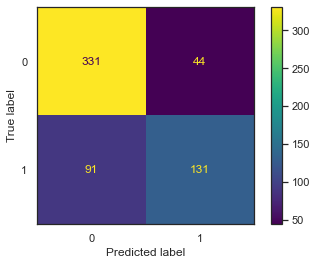

Model  Train Accuracy  Test Accuracy  Precision Score  \
0  Modelo 1: Decision Tree        0.805036       0.798995         0.880597   
1  Modelo 2: Random Forest        0.882014       0.773869         0.748571   

   Recall Score  F1 Score  
0      0.531532  0.662921  
1      0.590090  0.659950

In [58]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
prec_score = precision_score(y_test, y_test_pred)
rec_score = recall_score(y_test, y_test_pred)
f1_score_val = f1_score(y_test, y_test_pred) 

vals=["Modelo 2: Random Forest",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]

new_row = dict(zip(df_metrics.columns, vals))
df_metrics = df_metrics.append(new_row, ignore_index=True)

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

df_metrics

In [59]:
 rf.feature_importances_

array([0.27192595, 0.04005419, 0.23806824, 0.05020301, 0.05150429,
       0.23323562, 0.0341483 , 0.08086041])

[Text(0, 0, 'Government Sector'),
 Text(1, 0, 'GraduateOrNot'),
 Text(2, 0, 'ChronicDiseases'),
 Text(3, 0, 'FrequentFlyer'),
 Text(4, 0, 'High Income'),
 Text(5, 0, 'EverTravelledAbroad'),
 Text(6, 0, 'FamilyMembers'),
 Text(7, 0, 'Age')]

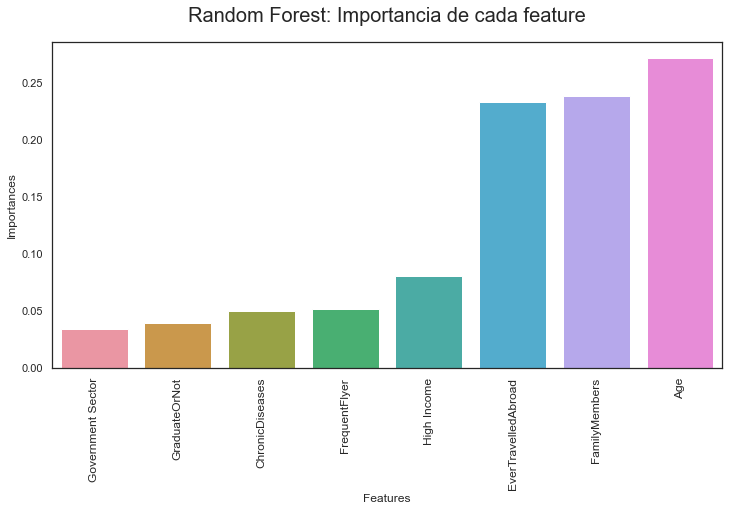

In [60]:
df_feat = pd.DataFrame()
df_feat["Features"] = X.columns
df_feat["Importances"] = rf.feature_importances_
df_feat.sort_values(["Importances"], inplace=True)

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.barplot(x=df_feat["Features"], y=df_feat["Importances"])
bp.axes.set_title("Random Forest: Importancia de cada feature",fontsize=20, pad=20)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90, fontsize=12)


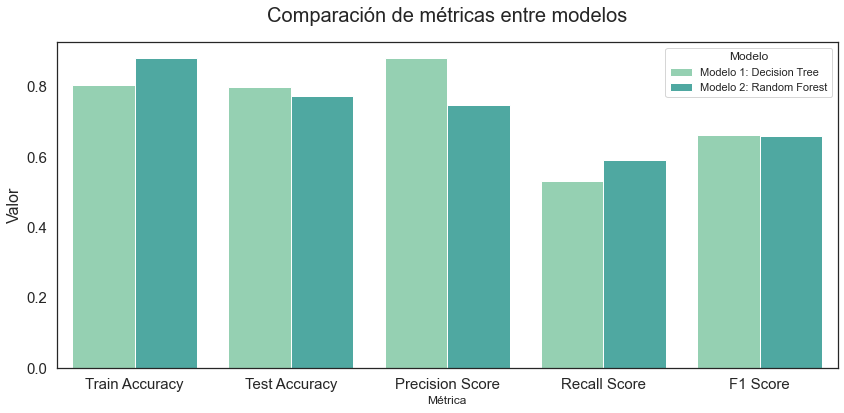

In [61]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics, id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy', 'Precision Score',
       'Recall Score', 'F1 Score'])
df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor", "Model":"Modelo"})

# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt)
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=16)
ax.tick_params(labelsize=15)

Podemos ver al comparar las métricas de ambos modelos que, con el random forest, efectivamente se ha logrado una mejora en el recall respecto al árbol de decisión, aunque la misma es pequeña (menos del 5%) y ocurre a expensas de una disminución en la presición. <br><br>
Respecto a la importancia de cada feature, vemos que sigue apareciendo EverTravelledAbroad como una de las principales, pero en el random forest cobran importancia también la edad y el grupo familiar

## Boosting

Como último intento de obtener un modelo con el recall más alto posible, se va a probar utilizando dos algoritmos de boosting: Adaboost y XGboost

### Adaboost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ada = AdaBoostClassifier(n_estimators=10,learning_rate=1)
model = ada.fit(X_train, y_train)


y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test)

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
#Precision Score
prec_score = precision_score(y_test, y_test_pred)
#Recall Score
rec_score = recall_score(y_test, y_test_pred)
#F1 Score
f1_score_val = f1_score(y_test, y_test_pred) 

vals=["Modelo 3: Adaboost",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]

print(vals)
new_row = dict(zip(df_metrics.columns, vals))
type(new_row)
df_metrics = df_metrics.append(new_row, ignore_index=True)
df_metrics

['Modelo 3: Adaboost', 0.7827338129496403, 0.7520938023450586, 0.7803030303030303, 0.46396396396396394, 0.5819209039548023]


Model  Train Accuracy  Test Accuracy  Precision Score  \
0  Modelo 1: Decision Tree        0.805036       0.798995         0.880597   
1  Modelo 2: Random Forest        0.882014       0.773869         0.748571   
2       Modelo 3: Adaboost        0.782734       0.752094         0.780303   

   Recall Score  F1 Score  
0      0.531532  0.662921  
1      0.590090  0.659950  
2      0.463964  0.581921

### XGBOOST

In [63]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)
clf_xgb.fit(X_train,y_train)

[08:21:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\leand\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

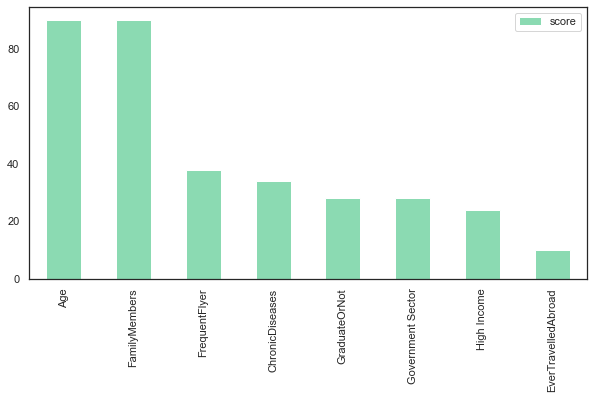

In [64]:
feature_important = clf_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='bar', figsize = (10,5)) ## plot top 40 features

In [65]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
#Precision Score
prec_score = precision_score(y_test, y_test_pred)
#Recall Score
rec_score = recall_score(y_test, y_test_pred)
#F1 Score
f1_score_val = f1_score(y_test, y_test_pred) 

vals=["Modelo 4: xgboost",train_accuracy, test_accuracy, prec_score, rec_score, f1_score_val]

print(vals)
new_row = dict(zip(df_metrics.columns, vals))
type(new_row)
df_metrics = df_metrics.append(new_row, ignore_index=True)
df_metrics

['Modelo 4: xgboost', 0.8410071942446044, 0.8023450586264657, 0.8661971830985915, 0.5540540540540541, 0.6758241758241759]


Model  Train Accuracy  Test Accuracy  Precision Score  \
0  Modelo 1: Decision Tree        0.805036       0.798995         0.880597   
1  Modelo 2: Random Forest        0.882014       0.773869         0.748571   
2       Modelo 3: Adaboost        0.782734       0.752094         0.780303   
3        Modelo 4: xgboost        0.841007       0.802345         0.866197   

   Recall Score  F1 Score  
0      0.531532  0.662921  
1      0.590090  0.659950  
2      0.463964  0.581921  
3      0.554054  0.675824

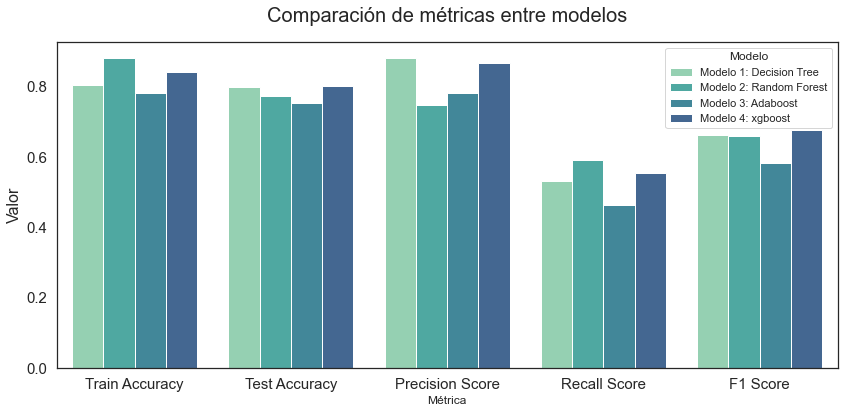

In [66]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics, id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy', 'Precision Score',
       'Recall Score', 'F1 Score'])
df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor", "Model":"Modelo"})

# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt)
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=16)
ax.tick_params(labelsize=15)

Se puede ver que no se ha logrado una gran mejora con Adaboost respecto a lo que ya se tenía. Sin embargo, con XGboost vemos
que se logra un recall bastante cercano al del random forest, pero con una precisión mucho mayor, lo que se traduce en que este modelo sea el que tenga el mayor F1 score de todos.<br><br>
Si miramos las importancias de cada feature para el modelo de XGBoost, vemos que lo que está considerando como más importante a la hora de clasificar los clientes no está muy alineado con lo que se observó en el análisis exploratorio.<br><br>
Buscando un equilibrio entre la complejidad del modelo y sus métricas, se concluye que **el modelo de random forest es el más adecuado**, ya que es el que tiene el deja la mejor cantidad de potenciales compradores de lado (mejor recall) y da importancia a las características que vimos que se destacan entre los compradores. Por último, si bien tiene menor precisión, el porcentaje de falsos negativos es de alrededor de 25%, lo cual resulta bastante aceptable si se tiene en cuenta que dichos falsos negativos comparten muchas características con quienes sí compraron el seguro, por lo que sería interesante incluirlos en la oferta ya que existe la posibilidad de que sí compren el seguro la próxima vez

## Aplicabilidad del modelo desde el punto de vista económico

Se probaron distintos modelos de clasificación a fin de identificar correctamente a aquellos clientes con mayor potencial de adquirir un seguro de viaje.<br>
De los modelos elegidos, el árbol de decisiones sencillo es el que da la pauta más clara a la hora de clasificar a los clientes, y se vió que un modelo más sofisticado, de Random Forest, da mejores métricas y por lo tanto fue el elegido.<br>
Se vió tambien que el modelo genera pocos falsos positivos pero sí una alta proporción de falsos negativos. De hecho, se eligió el modelo de random forest ya que la tasa de falsos negativos era un poco mejor que en los demás modelos, a expensas de convivir con una tasa un poco más alta de falsos positivos.<br><br>
Existen dos alternativas posibles: 
<ol>
    <li>ofrecer el producto a todos los clientes</li>
    <li>aplicar el modelo y ofrecer el producto sólo a aquellos clientes clasificados como potenciales candidados</li>
</ol>
<br>
En el primer caso, estamos maximizando las ventas ya que el ofrecimiento llegará a todos los clientes de la compañia. En el segundo caso, estaremos minimizando las pérdidas por ofrecer el producto a clientes que no tienen interés, ya que el modelo es muy confiable prediciendo quien estará interesado el en seguro, pero pasa por alto muchos potenciales clientes.
<br>
La elección de una u otra estrategia dependerá básicamente del costo de promoción del producto. Si el mismo es despreciable, conviene definitivamente ofrecérselo a todo el mundo. Por otro lado, si el costo es muy elevado (envío de merchandising, ventas personalizadas, etc), entonces quizás sea conveniente aplicar el modelo y minimizar pérdidas.

Para ilustrar esto, consideremos la diferencia entre las ganancias generadas aplicando o no el modelo. <br>

\begin{equation}
Ganancia = Ingresos\ por\ ventas - Costo\ de\ promoción
\end{equation}

Supongamos que **V** es el dinero que se gana por cada seguro vendido, sin tener en cuenta el costo de promoción.<br>
Llamemos **X** al costo de promoción del producto y definamos a X como una fracción de V, que va entre 0 y 1. O sea, X da la proporción de la venta que se pierde por promocionar el producto; si X=0 la promoción es gratis, si X=1 se gasta la misma cantidad de dinero el promocionar el producto que lo que se gana en la venta, con lo cual la ganancia neta es cero.<br>
Llamamos $N_T$ al número total clientes y $N_M$ a los clientes identificados como positivos por el modelo.
Finalmente, llamamos $P$ a la proporción de compradores entre los clientes y $P_M$ a los verdaderos compradores dentro de los identificados por el modelo.<br>
Entonces tenemos:
<br>
\begin{equation}
Ganancia_{STD}= N_TPV - N_TXV
\end{equation}

\begin{equation}
Ganancia_{Modelo}= N_M  P_M  V - N_MXV
\end{equation}

<br> o sea que la diferencia de ganacias es:
\begin{equation}
Ganancia_{Modelo} - Ganancia_{STD} = N_M  P_M  V - N_MXV - N_TPV + N_TXV
\end{equation}

<br> reagrupando:
\begin{equation}
Ganancia_{Modelo} - Ganancia_{STD} = V(N_MP_M - N_TP) + XV(N_T  - N_M)
\end{equation}
<br>
La ganancia aplicando el modelo será mayor a la de no aplicarlo cuando el la expresión del lado derecho de la ecuación sea mayor que cero. Cancelamos V entonces y nos queda que
<br>
\begin{equation}
Ganancia_{Modelo} > Ganancia_{STD}
\end{equation}
<br>
<center>si:</center>
<br>
\begin{equation}
(N_MP_M - N_TP) + X(N_T  - N_M)>0
\end{equation}
<br>

$N_T$ -$N_M$ es un valor que siempre es mayor que cero, ya que el primero es el número total de clientes y el segundo en el número de potenciales compradores identificados por el modelo. Por lo tanto, a medida que aumenta X crece la ventaja de utilizar el modelo frente a ofrecere el paquete a todos los clientes, ya que se pierde menos dinero en ofrecimientos que no se traducen en ventas<br>
Por otro lado, si X=0, es decir, si ofrecer el paquete es gratis, entonces el segundo término se anula y nos queda $N_MP_M-N_TP$, siendo el primer término los verdaderos positivos identificados por el modelo, mientras que $N_TP$ son todos los positivos. Como los casos identificados por el modelo van a ser siempre menores o iguales que el total, dicho término es siempe menor o igual que cero. Esto significa que, *si el costo de ofrecer el producto es despreciable entonces se pierde dinero al aplicar el modelo, ya que el mismo deja afuera casos positivos.*

Recordemos que $P_M$ es la proporción de verdaderos compradores dentro de los identificados positivamente por el modelo, o sea *Pm es la precisión del modelo*.<br>
\begin{equation}
P_M = Precision = \frac{Verdaderos positivos}{verdaderos positivos + falsos positivos}
\end{equation}
<br>
Por otro lado, $N_TP$ son todos los compradores, es decir, los *verdaderos positivos + falsos negativos*. O sea que podemos relacionar $N_TP$ con el Recall como:
<br><br>
\begin{equation}
Recall = \frac{Verdaderos positivos}{verdaderos positivos + falsos negativos} = \frac{N_M P_M}{N_TP}
\end{equation}


Podemos redefinir entonces la ecuación que compara las ganancias a partir de los scores del modelo, Precision y Recall:
<br><br>
\begin{equation}
Ganancia_{Modelo} > Ganancia_{STD}
\end{equation}
<br>
<center>si</center>
<br>
\begin{equation}
P(Recall-1) + X(1  - P\frac{Recall}{Precision})>0
\end{equation}

El lado izquierdo de la desigualdad corresponde a la ecuación de una recta en función de X. Podemos graficar la recta para ver en que punto pasa por cero. A partir de dicho valor de X aplicar el modelo supondrá mayores ganancias que ofrecer el producto a todos los clientes.<br>
Para Random Forest tenemos:

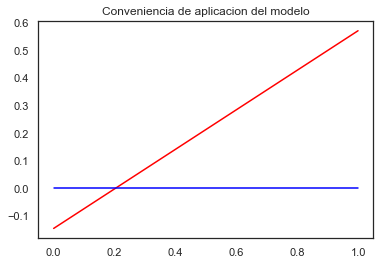

In [88]:
p=0.357
rec=0.59
prec=0.749
x_points = list(np.linspace(0,1,1000))
y = []

#Pendiente de la recta
m=1-p*(rec/prec)
#Ordenada
b=p*(rec-1)

for x in x_points:
    y.append(m*x+b)

plt.figure()
plt.title('Conveniencia de aplicacion del modelo')

plt.plot(x_points,y, color='red')
plt.plot(x_points,list(np.zeros(len(x_points))), color='blue')

Vemos, como esperábamos, que para costos bajos la diferencia de ganancias es negativa, pero se hace positiva aproximadamente a partir de 0,2. Es decir:<br>
**Conviene aplicar el modelo para identificar potenciales clientes cuando el costo de la promoción del producto supera en aproximadamente un 20% la ganancia obtenida por la venta**

## Conclusiones

<ul>
    <li>Se estudiaron las características de los clientes que adquieren el seguro y se detectó que aquellas personas que han viajado antes al exterior o son viajeros frecuentes, que tienen una famila de 4 o más miembros y que tienen mejor posición económica son los mejores candidatos a la hora de ofrecer un seguro de viaje.</li>
    <li>Se desarrolló un modelo de Machine Learning (Random Forest) capaz de clasificar a los clientes e identificar aquellos con alto potencial de adquirir el seguro </li>
    <li>El modelo desarrollado es mucho más eficiente minimizando las pérdidas que maximizando las ventas, ya que genera pocos falsos positivos pero pasa por alto una gran proporción de los potenciales compradores</li>
    <li>Se mostró que el modelo es económicamente ventajoso cuando el costo de promoción del seguro es una fracción elevada de la ganancia obtenida por la venta, y se estimó que cuando dicho costo supera el 20% es conveniente aplicar el modelo</li>
    <li>Respecto a un potencial interés frente a un seguro de covertura por COVID-19, vemos que el dataset no cuenta con información relevante al respecto como para poder hacer alguna clase de preducción. La única variable relacionada con la salud, la presencia de enfermedades crónicas, no tuvo ningún peso a la hora de decidir la adquisición del seguro. Sin embargo, dado que el seguro fue ofrecido antes de la pandemia es probale que dicha variable tenga influencia en futuras compras</li>
</ul>